## LDA Topic Model for Text Analysis

## DATA COLLECTION USING WEBSCRAPING

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# webdriver for Firefox - geckodriver
driver = webdriver.Chrome()

# sticky timeout to implicitly wait for an element to be found
driver.implicitly_wait(10) 

# open url in the browser
driver.get('https://www.naukri.com/')

In [3]:
# enter job role - data scientist
role=driver.find_element(By.XPATH,"//*[@id='root']/div[7]/div/div/div[1]/div/div/div/div[1]/div/input")
role.send_keys('big data')

# location - India
location=driver.find_element(By.XPATH,"//*[@id='root']/div[7]/div/div/div[5]/div/div/div/div[1]/div/input")
location.send_keys('')

# click search
driver.find_element(By.CLASS_NAME,'qsbSubmit').click()

In [4]:
# new dataframe fwith required columns
df=pd.DataFrame(columns=['Job_Role','Company','Location','Job Experience','Skills','Job_Description'])
df

,Job_Role,Company,Location,Job Experience,Skills,Job_Description


In [5]:
# helper function

# Function to convert  a list to string
def listToString(s): 
    
    # initialize an empty string
    str1 = ", " 
    
    # return string  
    return (str1.join(s))

In [6]:
%%time
from selenium.common.exceptions import NoSuchElementException

# Initialize the page number
page = 1

# Set the maximum number of pages to scrape
max_pages = 20

while page <= max_pages:
    try:
        # Scrape up to 20 results on the current page
        for i in range(1, 21):
            try:
                role = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/div[1]/div[1]/a'.format(i)).text
                company = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/div[1]/div[1]/div/a[1]'.format(i)).text
                location = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/div[1]/ul/li[3]/span'.format(i)).text
                experience = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/div[1]/ul/li[1]/span[1]'.format(i)).text.replace(' Yrs', '')
                job_description = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/div[2]'.format(i)).text
                skill_lst = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[2]/article[{}]/ul'.format(i)).text.split('\n')
                skill = listToString(skill_lst)
                # Append collected information to the DataFrame df
                df.loc[len(df.index)] = [role, company, location, experience, skill, job_description]
            except NoSuchElementException:
                pass

        page += 1

        # Click the "Next" button
        try:
            nxt = driver.find_element(By.XPATH, '//*[@id="root"]/div[4]/div/div/section[2]/div[3]/div/a[2]')
            driver.execute_script("arguments[0].click();", nxt)
        except NoSuchElementException:
            print("No more pages to scrape. Exiting the loop.")
            break

    except Exception as e:
        print("An error occurred:", e)
        break

No more pages to scrape. Exiting the loop.
Wall time: 3min 30s


In [7]:
df.shape

(0, 6)

In [8]:
df = df.drop_duplicates()

df.shape

(0, 6)

In [12]:
df.to_csv("big_data_roles.csv")

## CHALLANGE 1 : BIG DATA JOB FAMILY IDENTIFICATION

In [13]:
dfs=['business_analyst.csv','Hadoop_developer.csv','data_scientist.csv','data_engineer.csv']
df = pd.concat(map(pd.read_csv, dfs))
#df.to_csv("big_data_roles.csv")

In [14]:
df.head()

,Unnamed: 0,Job_Role,Company,Location,Job Experience,Skills,Job_Description
0,0,Merilytics - Business Analyst (Analytics),Merilytics,Hyderabad/Secunderabad,0-2,"excel, Business Analytics, Problem Solving, Da...",(v) Cab reimbursement for women employees beyo...
1,1,Stars Business Analyst,Ford,Chennai,0-5,"Training, Application support, Business Analys...",Coordinate and / or deliver training to custom...
2,2,Business Analyst,Isoftstone,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",0-5,"Automation, digital content, Business Analyst,...",A Bachelors or Masters in Computer Science or ...
3,3,Business Analyst,NCR Corporation,Hyderabad/Secunderabad,5-10,"Telecom, Hospitality, Business Analyst, Agile ...","Along with the BA role, candidate should be ab..."
4,4,Business Analyst,Regalix,Remote,1-4,"Business Analytics, SQL, Business Analysis, Po...",Location: Bangalore/ Hyderabad ( Work From Hom...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 978
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3757 non-null   int64 
 1   Job_Role         3757 non-null   object
 2   Company          3757 non-null   object
 3   Location         3757 non-null   object
 4   Job Experience   3757 non-null   object
 5   Skills           3757 non-null   object
 6   Job_Description  3757 non-null   object
dtypes: int64(1), object(6)
memory usage: 234.8+ KB


In [16]:
df.shape

(3757, 7)

In [17]:
df['Job_Role'].nunique()

1246

In [18]:
df['Job_Role']=df['Job_Role'].str.replace('[\'\/\-\(\)\|\||]','')

In [19]:
df['Job_Role'].unique()

array(['Merilytics  Business Analyst Analytics', 'Stars Business Analyst',
       'Business Analyst', ..., 'Hiring GCP  Data Engineering Lead',
       'Tech Lead  Data Engineering', 'Data Engineering Lead  SME'],
      dtype=object)

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   [WinError
[nltk_data]     10053] An established connection was aborted by the
[nltk_data]     software in your host machine


False

In [29]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming your DataFrame is named 'df' and the column containing the text is named 'text_column'

# Load the NLTK English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a given text
def remove_stop_words(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filter out stop words
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a string

# Apply the remove_stop_words function to the text_column and store the results in a new column
df['Job_Role'] = df['Job_Role'].apply(remove_stop_words)

# Display the resulting DataFrame with stop words removed
print(df['Job_Role'])


0      Merilytics Business Analyst Analytics
1                     Stars Business Analyst
2                           Business Analyst
3                           Business Analyst
4                           Business Analyst
                       ...                  
974         Hiring GCP Data Engineering Lead
975                       Lead Data Engineer
976               Tech Lead Data Engineering
977                Data Engineering Lead SME
978                       Lead Data Engineer
Name: Job_Role, Length: 3757, dtype: object


In [30]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# Assuming your DataFrame is named 'df' and the job title column is named 'job_title'

# Concatenate all job titles into a single string
all_titles = ' '.join(df['Job_Role'].values)

# Tokenize the job titles into individual words
tokens = all_titles.split()

# Generate all possible bigrams from the tokens
bigrams =  ngrams(tokens,2)
trigrams = ngrams(tokens,3)

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Sort the bigrams by their frequency count in descending order
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted list of bigrams and their counts


In [31]:
for bigram, count in sorted_bigrams:
    print('Bigram:', bigram, 'Count:', count)
    

Bigram: ('Business', 'Analyst') Count: 913
Bigram: ('Data', 'Engineer') Count: 885
Bigram: ('Application', 'Developer') Count: 753
Bigram: ('Analyst', 'Business') Count: 682
Bigram: ('Data', 'Scientist') Count: 656
Bigram: ('Engineer', 'Data') Count: 479
Bigram: ('Developer', 'SAP') Count: 323
Bigram: ('Scientist', 'Data') Count: 288
Bigram: ('Senior', 'Data') Count: 187
Bigram: ('Developer', 'Microsoft') Count: 167
Bigram: ('Big', 'Data') Count: 103
Bigram: ('Services', 'Application') Count: 102
Bigram: ('Data', 'Services') Count: 97
Bigram: ('Azure', 'Data') Count: 97
Bigram: ('Scientist', 'Senior') Count: 91
Bigram: ('Microsoft', 'Dynamics') Count: 83
Bigram: ('SAP', 'ABAP') Count: 81
Bigram: ('Engineer', 'Senior') Count: 80
Bigram: ('Hadoop', 'Developer') Count: 70
Bigram: ('Technical', 'Application') Count: 70
Bigram: ('HANA', 'Application') Count: 67
Bigram: ('Lead', 'Data') Count: 66
Bigram: ('ABAP', 'Development') Count: 62
Bigram: ('Development', 'HANA') Count: 60
Bigram: ('De

In [32]:
for trigram, count in sorted_trigrams:
    print('Trigram:',trigram, 'Count:', count)

Trigram: ('Business', 'Analyst', 'Business') Count: 674
Trigram: ('Analyst', 'Business', 'Analyst') Count: 659
Trigram: ('Data', 'Engineer', 'Data') Count: 443
Trigram: ('Engineer', 'Data', 'Engineer') Count: 407
Trigram: ('Application', 'Developer', 'SAP') Count: 316
Trigram: ('Data', 'Scientist', 'Data') Count: 278
Trigram: ('Scientist', 'Data', 'Scientist') Count: 257
Trigram: ('Application', 'Developer', 'Microsoft') Count: 166
Trigram: ('Services', 'Application', 'Developer') Count: 102
Trigram: ('Data', 'Services', 'Application') Count: 96
Trigram: ('Senior', 'Data', 'Scientist') Count: 96
Trigram: ('Data', 'Scientist', 'Senior') Count: 90
Trigram: ('Senior', 'Data', 'Engineer') Count: 83
Trigram: ('Developer', 'Microsoft', 'Dynamics') Count: 78
Trigram: ('Data', 'Engineer', 'Senior') Count: 76
Trigram: ('Technical', 'Application', 'Developer') Count: 70
Trigram: ('Scientist', 'Senior', 'Data') Count: 69
Trigram: ('HANA', 'Application', 'Developer') Count: 67
Trigram: ('Developer

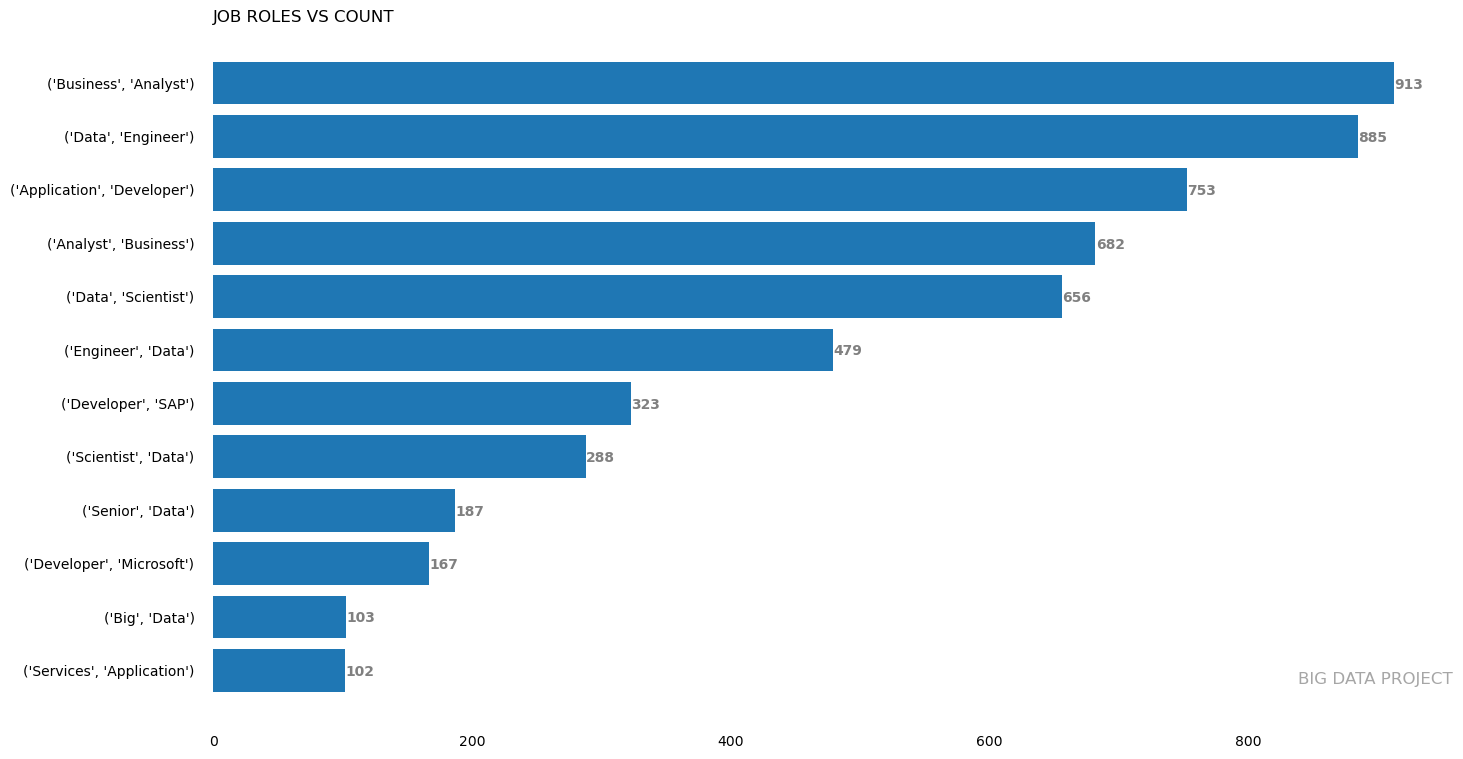

In [33]:
jobs=[]
counts=[]

for bigram, count in sorted_bigrams:
    if count>100 and bigram not in jobs:
        #print('Bigram:', bigram, 'Count:', count)
        jobs.append(str(bigram))
        counts.append(count)
        
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(jobs, counts)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#       linestyle ='-.', linewidth = 0.5,
#       alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

#Add Plot Title
ax.set_title('JOB ROLES VS COUNT',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [35]:
'''
1.Data Engineer
2.Data Scientist
3.Business Analyst
4.Hadoop Developer
'''

'\n1.Data Engineer\n2.Data Scientist\n3.Business Analyst\n4.Hadoop Developer\n'

## CHALLENGE 2. HIGHLY VALUED BIGDATA SKILLS IDENTIFICATION

In [36]:
all_skills = ' '.join(df['Skills'].values)

In [37]:
all_skills

'excel, Business Analytics, Problem Solving, Data Analysis, Python, Power Bi, Advanced Excel, Tableau Training, Application support, Business Analyst, Instructional design, Project management, Design development, Powerpoint, Sharepoint Automation, digital content, Business Analyst, Technology consulting, Technical design, Analytical, Manager Technology, SDK Telecom, Hospitality, Business Analyst, Agile scrum, Functional testing, Manager Technology, Agile methodology, Recruitment Business Analytics, SQL, Business Analysis, Power Bi, SQL Queries, Tableau, Dashboards, Salesforce CRM Business Analytics, analytical, Requirement Gathering, business analysis, Statistics, Requirements, Analysis, Analytics Policy Administration, Casualty, Property, Business analysis, Administration, Guidewire Guidewire, Forms, Integration, Billing Center, Policy Center, Rating, business analysis, Forming business analysis, vendor management, Life Insurance Analyst, INGENIUM, Business Analyst, Business Analytics

In [38]:
skills_list = all_skills.split(",")

In [39]:
len(skills_list)

25419

In [40]:
k=set(skills_list)

In [41]:
len(k)

7133

In [42]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=nltk.corpus.stopwords.words('english')

In [45]:
def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text
df['JD']=df['Skills'].apply(clean_text)

BadZipFile: File is not a zip file

In [92]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['JD'])

In [93]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=4,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [94]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  6.543285811987838 %
Topic  1 :  6.686214644214148 %
Topic  2 :  80.37112101219776 %
Topic  3 :  6.399378531600251 %


In [95]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ",end='\n')
    for t in sorted_words:
        print(t[0],end="\n")

Topic 0: 
data
engineering
azure
python
spark
cloud
scala
hadoop
pyspark
warehousing
Topic 1: 
data
analytics
learning
machine
mining
analysis
business
management
modeling
analytical
Topic 2: 
performance
tuning
python
scientist
analysis
perl
pandas
matlab
business
data
Topic 3: 
data
management
computer
agile
science
technology
quality
design
development
application


## CHALLENGE 3. COMPETENCE LEVEL CHARECTERIZATION

In [43]:
import numpy as np
import pandas as pd
import re , nltk ,gensim,spacy
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df.head()

,Unnamed: 0,Job_Role,Company,Location,Job Experience,Skills,Job_Description
0,0,Merilytics Business Analyst Analytics,Merilytics,Hyderabad/Secunderabad,0-2,"excel, Business Analytics, Problem Solving, Da...",(v) Cab reimbursement for women employees beyo...
1,1,Stars Business Analyst,Ford,Chennai,0-5,"Training, Application support, Business Analys...",Coordinate and / or deliver training to custom...
2,2,Business Analyst,Isoftstone,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",0-5,"Automation, digital content, Business Analyst,...",A Bachelors or Masters in Computer Science or ...
3,3,Business Analyst,NCR Corporation,Hyderabad/Secunderabad,5-10,"Telecom, Hospitality, Business Analyst, Agile ...","Along with the BA role, candidate should be ab..."
4,4,Business Analyst,Regalix,Remote,1-4,"Business Analytics, SQL, Business Analysis, Po...",Location: Bangalore/ Hyderabad ( Work From Hom...


In [45]:
df['Skills'].values

array(['excel, Business Analytics, Problem Solving, Data Analysis, Python, Power Bi, Advanced Excel, Tableau',
       'Training, Application support, Business Analyst, Instructional design, Project management, Design development, Powerpoint, Sharepoint',
       'Automation, digital content, Business Analyst, Technology consulting, Technical design, Analytical, Manager Technology, SDK',
       ...,
       'Unix, GIT, Linux, Architecture, GCP, Machine learning, Data processing, Continuous improvement',
       'Assurance, Data management, Analytical, Agile, Healthcare, PLSQL, Data quality, Informatica',
       'Computer science, Business transformation, RDBMS, Agile development, Schema, Cloud, Corporate finance, Asset management'],
      dtype=object)

In [46]:
# Convert to list
data = df.Skills.values.tolist()

pprint(data[:2])

['excel, Business Analytics, Problem Solving, Data Analysis, Python, Power Bi, '
 'Advanced Excel, Tableau',
 'Training, Application support, Business Analyst, Instructional design, '
 'Project management, Design development, Powerpoint, Sharepoint']


## Tokenize

Now we want to tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

We used Gensim here, use (deacc=True) to remove the punctuations.

In [47]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['excel', 'business', 'analytics', 'problem', 'solving', 'data', 'analysis', 'python', 'power', 'bi', 'advanced', 'excel', 'tableau']]


## Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns. You can expect better topics to be generated in the end.

In [48]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [49]:
# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])

['excel business analytic problem solve datum analysis advance tableau', 'training application support business analyst design project management design development powerpoint sharepoint']


## Create the Document-Word matrix
The LDA topic model algorithm requires a document word matrix as the main input.

You can create one using CountVectorizer. In the below code, I have configured the CountVectorizer to consider words that has occurred at least 10 times (min_df), remove built-in english stopwords, convert all words to lowercase, and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.

In [50]:
vectorizer = CountVectorizer(analyzer='word',min_df=30,stop_words='english',lowercase=True,token_pattern='[a-zA-Z0-9]{3,}')
data_vectorized = vectorizer.fit_transform(data_lemmatized)

## Build LDA model with sklearn

Everything is ready to build a Latent Dirichlet Allocation (LDA) model. Let’s initialise one and call fit_transform() to build the LDA model.

We have set the n_topics as 4 based on prior knowledge about the dataset. Later we will find the optimal number using grid search.

In [51]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
#print(lda_model)  # Model attributes

## Diagnose model performance with perplexity and log-likelihood
A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [52]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -115196.45279004614
Perplexity:  78.00210837827872
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


## Use GridSearch to determine the best LDA model.

The most important tuning parameter for LDA models is n_components (number of topics).

In addition,we are going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources. Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

In [51]:
# Define Search Param
search_params = {'n_components': [3,4,5,6], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0), n_jobs=1,
       param_grid={'n_topics': [3,4,5,6], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

ModuleNotFoundError: No module named 'sklearn.utils._pprint'

ModuleNotFoundError: No module named 'sklearn.utils._pprint'

ModuleNotFoundError: No module named 'sklearn.utils._pprint'

In [ ]:
# Best Model
lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", lda_model.perplexity(data_vectorized))

## Dominant topic

To classify a document as belonging to a particular topic, a logical approach is to see which topic has the highest contribution to that document and assign it. In the table below, we have greened out all major topics in a document and assigned the most dominant topic in its own column.

In [53]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized)
# column names
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0.040000,0.040000,0.270000,0.650000,3
Doc1,0.020000,0.460000,0.020000,0.490000,3
Doc2,0.460000,0.030000,0.030000,0.490000,3
Doc3,0.210000,0.180000,0.040000,0.570000,3
Doc4,0.030000,0.200000,0.030000,0.740000,3
Doc5,0.080000,0.020000,0.020000,0.870000,3
Doc6,0.050000,0.050000,0.050000,0.850000,3
Doc7,0.060000,0.310000,0.060000,0.560000,3
Doc8,0.200000,0.020000,0.020000,0.760000,3
Doc9,0.320000,0.160000,0.030000,0.490000,3


In [71]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,acceptance,account,accounting,administration,agile,algorithm,analysis,analyst,analytic,apache,...,use,user,visio,vision,visualization,warehouse,warehousing,web,workflow,xml
Topic0,0.250262,0.252401,0.251470,0.277220,0.277856,35.052276,12.445411,0.411057,8.156618,45.435236,...,0.255723,0.254899,0.252623,50.978421,0.303201,0.254886,0.253690,114.377917,0.300297,0.255296
Topic1,36.336335,8.704443,5.567594,16.757576,0.286390,0.251899,10.806948,0.271282,0.316742,0.280783,...,0.250497,10.309779,0.254258,0.251610,0.253869,0.288579,0.256624,0.262016,2.993783,38.181692
Topic2,0.250372,0.251532,0.251498,0.274525,0.261340,0.259872,245.487153,0.263490,357.917657,1.863218,...,0.251129,0.250585,0.252876,0.253857,116.036634,66.035317,132.941150,0.257390,0.271571,0.258683
Topic3,0.307038,37.651312,55.519720,30.832602,35.587486,0.251900,830.111373,468.112228,234.550472,0.257348,...,26.155953,45.227229,25.732167,0.250687,0.278177,0.255090,0.252632,0.260595,63.831121,0.256021


In [86]:
topic0=df_topic_keywords.iloc[0].sort_values()
topic0=topic0.iloc[-10:]

In [99]:
list(topic0.index)

['language',
 'web',
 'processing',
 'technology',
 'architecture',
 'computer',
 'science',
 'development',
 'machine',
 'learn']

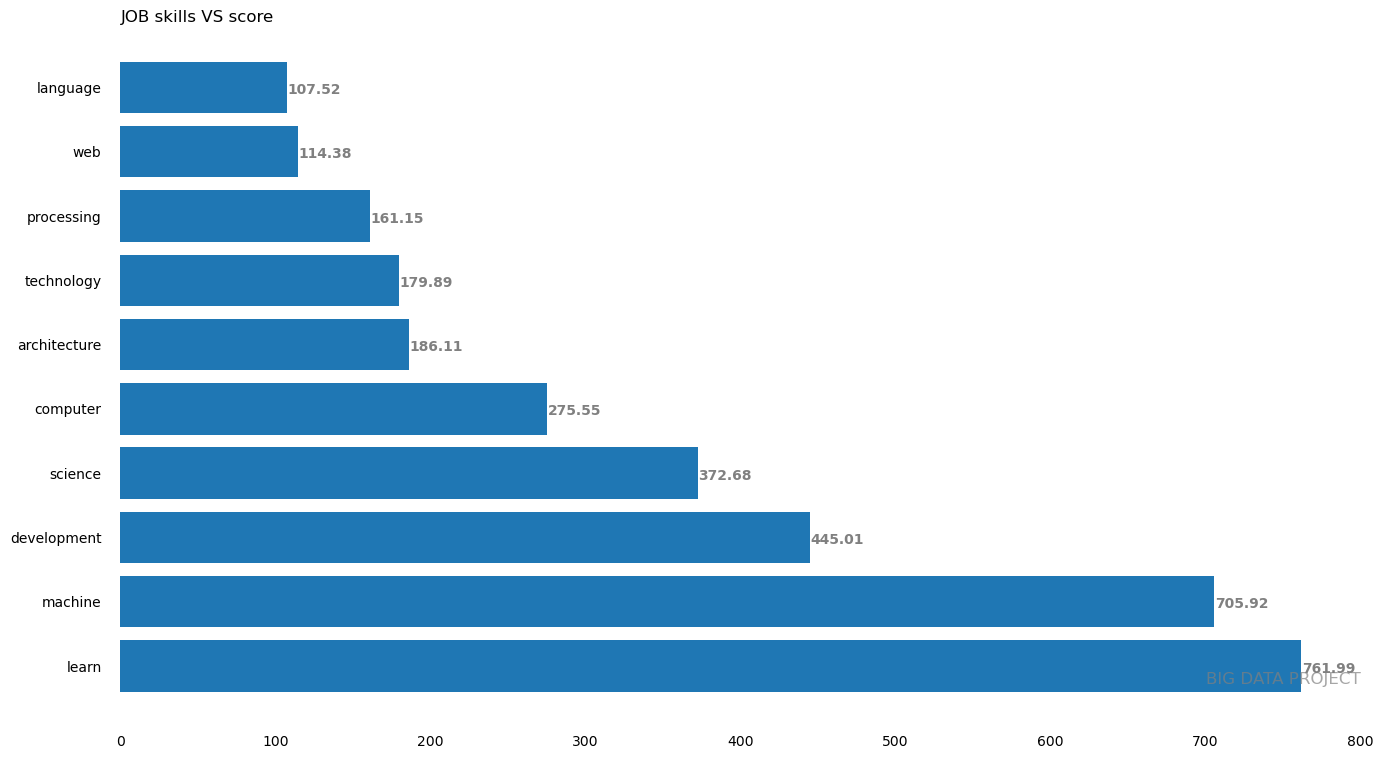

In [104]:
scores=[]
for i in range(len(topic0)):
    scores.append(topic0[:][i])
    skills=list(topic0.index)
    
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(skills, scores)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#       linestyle ='-.', linewidth = 0.5,
#       alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

#Add Plot Title
ax.set_title('JOB skills VS score',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [55]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,learn,machine,development,science,computer,architecture,technology,processing,web,language,design,programming,software,intelligence,learning
Topic 1,application,testing,test,development,performance,supply,chain,script,design,developer,code,tool,network,mysql,tune
Topic 2,datum,engineering,analytic,data,model,analysis,mining,azure,sql,modeling,spark,management,service,etl,quality
Topic 3,business,management,analysis,analyst,process,project,analytic,skill,service,product,requirement,manager,customer,quality,operation


In [56]:
Topics = ["Developer","Data Science","Data Engineer","Business Analyst"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,learn,machine,development,science,computer,architecture,technology,processing,web,language,design,programming,software,intelligence,learning,Developer
Topic 1,application,testing,test,development,performance,supply,chain,script,design,developer,code,tool,network,mysql,tune,Data Science
Topic 2,datum,engineering,analytic,data,model,analysis,mining,azure,sql,modeling,spark,management,service,etl,quality,Data Engineer
Topic 3,business,management,analysis,analyst,process,project,analytic,skill,service,product,requirement,manager,customer,quality,operation,Business Analyst
